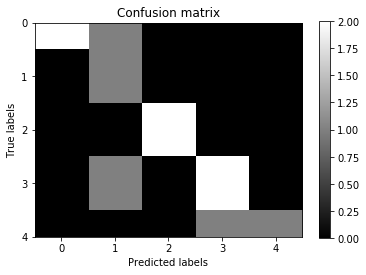


              precision    recall  f1-score   support

    Class-0       1.00      0.67      0.80         3
    Class-1       0.33      1.00      0.50         1
    Class-2       1.00      1.00      1.00         2
    Class-3       0.67      0.67      0.67         3
    Class-4       1.00      0.50      0.67         2

avg / total       0.85      0.73      0.75        11



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Define sample labels
true_labels = [2, 0, 0, 2, 4, 4, 1, 0, 3, 3, 3]
pred_labels = [2, 1, 0, 2, 4, 3, 1, 0, 1, 3, 3]

# Create confusion matrix
confusion_mat = confusion_matrix(true_labels, pred_labels)

# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

# Classification report
targets = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4']
print('\n', classification_report(true_labels, pred_labels, target_names=targets))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn import cross_validation

# Input file containing data
input_file = 'income_data.txt'

# Read the data
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break

        if '?' in line:
            continue

        data = line[:-1].split(', ')

        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

# Convert to numpy array
X = np.array(X)

# Convert string data to numerical data
label_encoder = [] 
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    if item.isdigit(): 
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

# Create SVM classifier
classifier = OneVsOneClassifier(LinearSVC(random_state=0))

# Train the classifier
classifier.fit(X, y)

# Cross validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=5)
classifier = OneVsOneClassifier(LinearSVC(random_state=0))
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

# Compute the F1 score of the SVM classifier
f1 = cross_validation.cross_val_score(classifier, X, y, scoring='f1_weighted', cv=3)
print("F1 score: " + str(round(100*f1.mean(), 2)) + "%")

# Predict output for a test datapoint
input_data = ['37', 'Private', '215646', 'HS-grad', '9', 'Never-married', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', '0', '0', '40', 'United-States']

# Encode test datapoint
input_data_encoded = [-1] * len(input_data)
count = 0
for i, item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform(input_data[i]))
        count += 1 

input_data_encoded = np.array(input_data_encoded)

# Run classifier on encoded datapoint and print output
predicted_class = classifier.predict(input_data_encoded)
print(label_encoder[-1].inverse_transform(predicted_class)[0])
